In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('big_data.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6807 non-null   int64  
 1   INJURY_BAD           6807 non-null   float64
 2   HELMET_USED          6807 non-null   float64
 3   age_bins             6807 non-null   object 
 4   SAFE_PEDAL_ACTION    6807 non-null   object 
 5   PROTECTIVE_CLOTHING  6807 non-null   float64
 6   SAFE_LOCATION        6807 non-null   float64
 7   WEATHER_CAT          6807 non-null   object 
 8   road_surf_bins       6807 non-null   object 
 9   DAYTIME              6807 non-null   int64  
 10  SPEED_RATING         6807 non-null   object 
 11  physical_bins        6807 non-null   object 
 12  hour_bins            6807 non-null   object 
 13  SEX                  6807 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 744.6+ KB


In [15]:
df = df.drop(['Unnamed: 0','road_surf_bins'],axis=1)

In [16]:
df = df.loc[df['SEX'] != 'X']

In [17]:
df = df.loc[df['physical_bins'] != 'Shaken']

In [18]:
df['SEX'].value_counts()

M    5202
F    1369
Name: SEX, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6571 entries, 0 to 6806
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INJURY_BAD           6571 non-null   float64
 1   HELMET_USED          6571 non-null   float64
 2   age_bins             6571 non-null   object 
 3   SAFE_PEDAL_ACTION    6571 non-null   object 
 4   PROTECTIVE_CLOTHING  6571 non-null   float64
 5   SAFE_LOCATION        6571 non-null   float64
 6   WEATHER_CAT          6571 non-null   object 
 7   DAYTIME              6571 non-null   int64  
 8   SPEED_RATING         6571 non-null   object 
 9   physical_bins        6571 non-null   object 
 10  hour_bins            6571 non-null   object 
 11  SEX                  6571 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 667.4+ KB


## Plotting using big johns data

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=2)
sns.set_style(style='white') 

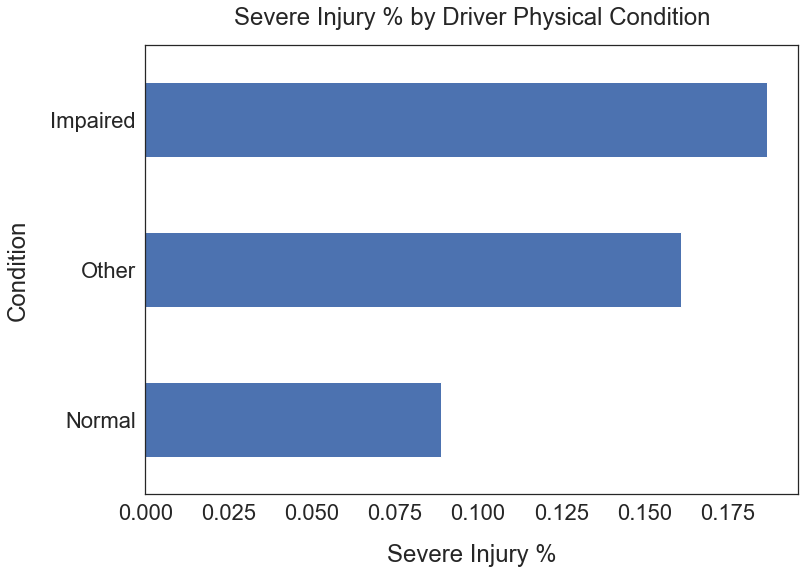

In [51]:
ax = df.groupby(by=['physical_bins'])['INJURY_BAD'].mean().sort_values().plot(kind='barh');

ax.set_xlabel('Severe Injury %',labelpad=20)
ax.set_ylabel('Condition',labelpad=20)
ax.set_title('Severe Injury % by Driver Physical Condition',pad=20)
ax.grid(False)

plt.savefig("Models/Physical_Condition.jpeg", bbox_inches = 'tight')

plt.show()

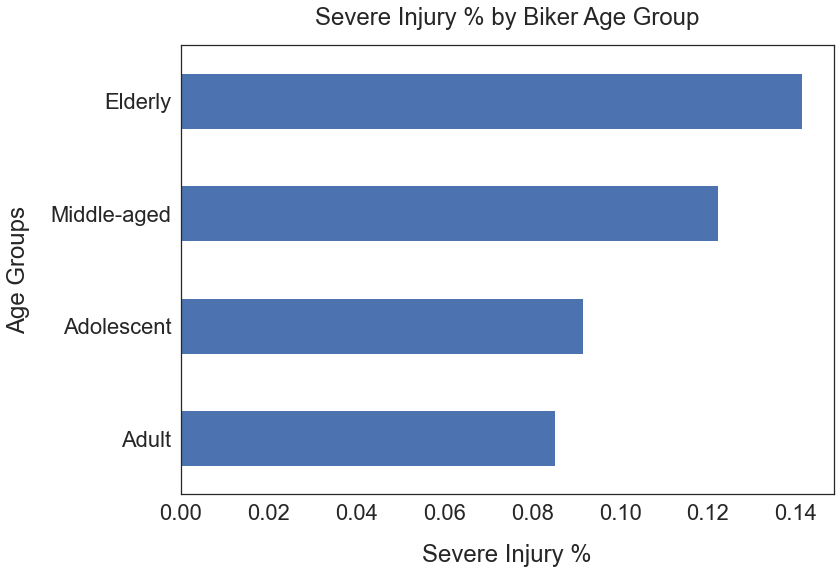

In [50]:
ax = df.groupby(by=['age_bins'])['INJURY_BAD'].mean().sort_values().plot(kind='barh')

ax.set_xlabel('Severe Injury %',labelpad=20)
ax.set_ylabel('Age Groups',labelpad=20)
ax.set_title('Severe Injury % by Biker Age Group',pad=20)
ax.grid(False)

plt.savefig("Models/Age_Group.jpeg", bbox_inches = 'tight')

plt.show()

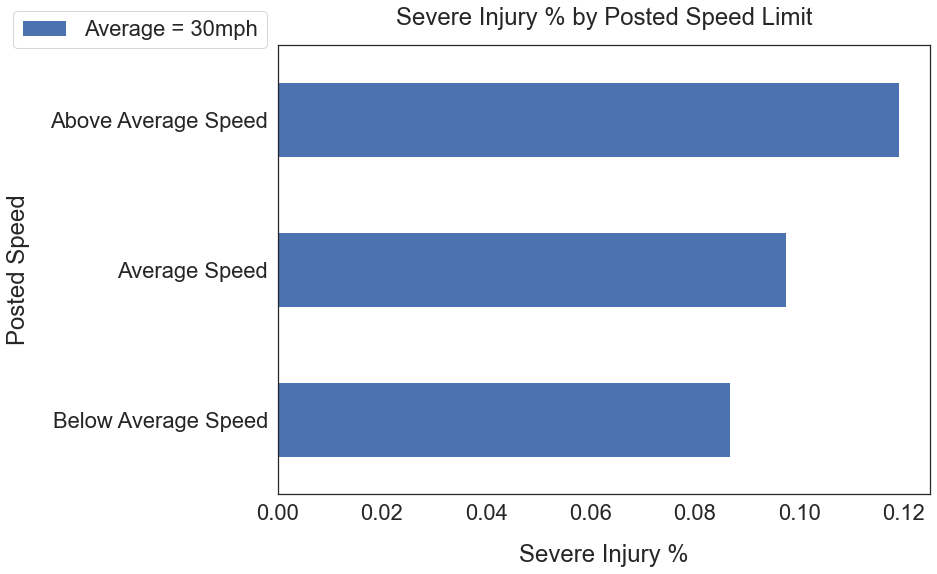

In [49]:
ax = df.groupby(by=['SPEED_RATING'])['INJURY_BAD'].mean().sort_values().plot(kind='barh');

ax.set_xlabel('Severe Injury %',labelpad=20)
ax.set_ylabel('Posted Speed',labelpad=20)
ax.set_title('Severe Injury % by Posted Speed Limit',pad=20)
ax.legend(['Average = 30mph'], bbox_to_anchor=(0, 1.1), ncol=2)
ax.grid(False)

plt.savefig("Models/Speed_Limit.jpeg", bbox_inches = 'tight')

plt.show()


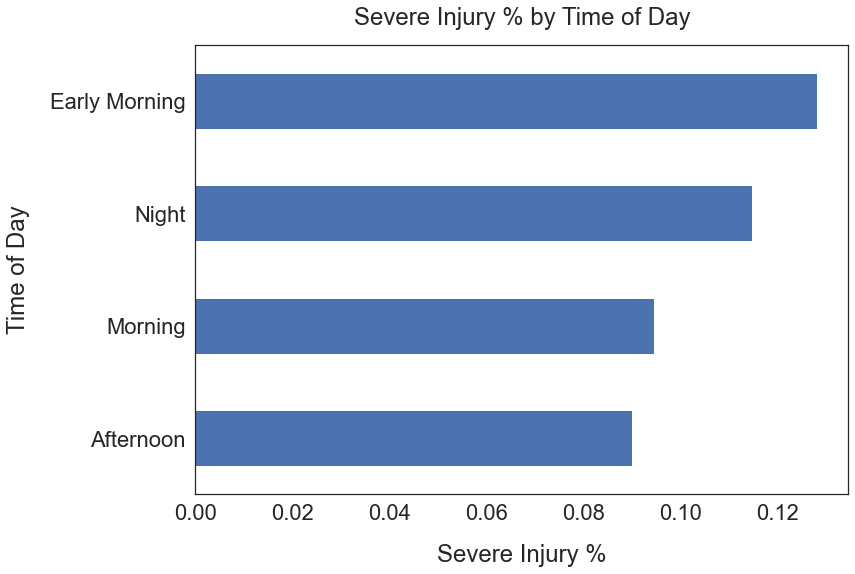

In [48]:
ax = df.groupby(by=['hour_bins'])['INJURY_BAD'].mean().sort_values().plot(kind='barh');

ax.set_xlabel('Severe Injury %',labelpad=20)
ax.set_ylabel('Time of Day',labelpad=20)
ax.set_title('Severe Injury % by Time of Day',pad=20)
ax.grid(False)

plt.savefig("Models/Time_of_Day.jpeg", bbox_inches = 'tight')

plt.show()

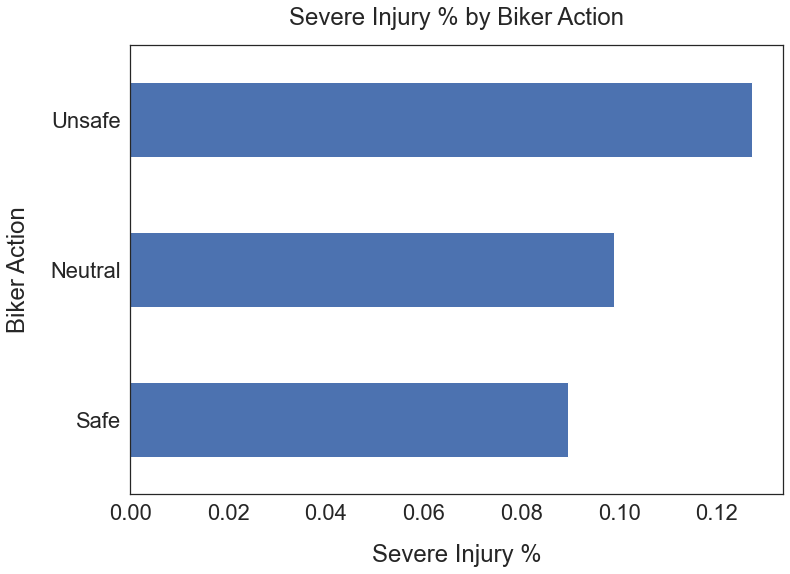

In [47]:
ax = df.groupby(by=['SAFE_PEDAL_ACTION'])['INJURY_BAD'].mean().sort_values().plot(kind='barh');

ax.set_title('Severe Injury % by Biker Action',pad=20)
ax.set_xlabel('Severe Injury %',labelpad=20)
ax.set_ylabel('Biker Action',labelpad=20)
ax.grid(False)

plt.savefig("Models/Biker_Action.jpeg", bbox_inches = 'tight')

plt.show()